![1](images/1.jpg)

A continuación, se presenta un **código completo y funcional** para simular el modelo de Gray-Scott, basado en la información de las imágenes proporcionadas. Puedes copiar y pegar este código directamente en un archivo de Jupyter Notebook (`.ipynb`) y ejecutarlo celda por celda para ver el resultado.

-----

### 1\. Configuración inicial y parámetros

Esta celda configura todas las librerías necesarias y define los parámetros del dominio y del modelo de Gray-Scott.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time

# --- Parámetros de la simulación ---
# Parámetros espaciales
Lx, Ly = 5.0, 5.0  # Dimensiones del dominio (5m x 5m)
nx, ny = 192, 192  # Número de puntos en cada dirección (192 x 192)
dx, dy = Lx/(nx-1), Ly/(ny-1) # Espaciamiento de la grilla

# Parámetros del patrón (para "Bacteria 2")
# Puedes cambiar F y k para generar otros patrones
Du, Dv = 0.00014, 0.00006  # Tasas de difusión
F, k = 0.035, 0.065 # Parámetros de alimentación y eliminación

# Parámetros temporales
t = 8000.0  # Tiempo final
dt = 9.0 * dx**2 / (40.0 * max(Du, Dv))  # Tamaño del paso de tiempo
nt = int(t / dt)  # Número total de pasos
print(f"Número de pasos de tiempo: {nt}")
print(f"Tamaño del paso de tiempo: {dt:.6f}s")

# Configuración de Matplotlib
%matplotlib inline

Número de pasos de tiempo: 7263
Tamaño del paso de tiempo: 1.101356s


### 2\. Condición inicial

Esta sección crea el estado inicial del sistema con las concentraciones de `U` y `V`. El código inicializa las matrices y luego introduce pequeñas perturbaciones.


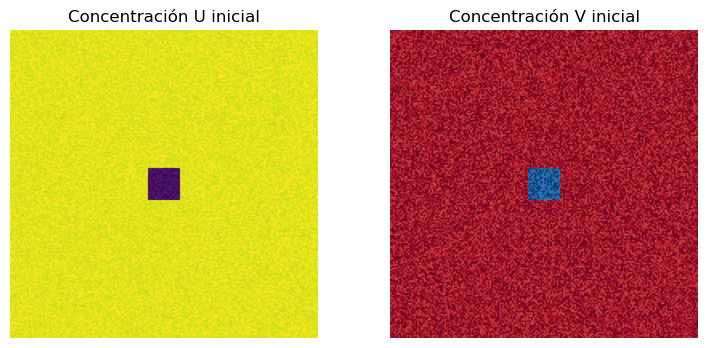

In [2]:
# Crea las matrices de U y V
U = np.ones((nx, ny))
V = np.zeros((nx, ny))

# Introduce una perturbación inicial
# Se usa un pequeño bloque en el centro
center_x, center_y = nx // 2, ny // 2
radius = 10
U[center_x-radius:center_x+radius, center_y-radius:center_y+radius] = 0.50
V[center_x-radius:center_x+radius, center_y-radius:center_y+radius] = 0.25

# Añade ruido aleatorio para romper la simetría
U += 0.05 * np.random.random((nx, ny))
V += 0.05 * np.random.random((nx, ny))

# Muestra el estado inicial
fig, ax = plt.subplots(ncols=2, figsize=(9.0, 4.0))
ax[0].imshow(U, cmap='viridis')
ax[0].set_title('Concentración U inicial')
ax[0].axis('off')
ax[1].imshow(V, cmap='RdBu')
ax[1].set_title('Concentración V inicial')
ax[1].axis('off')
plt.show()

### 3\. Función de simulación y animación

Esta celda contiene la lógica principal para resolver el sistema de ecuaciones. Usa un esquema de diferencias finitas en 2D para calcular el siguiente paso de tiempo. Se implementan condiciones de borde de **Neumann homogéneas**.

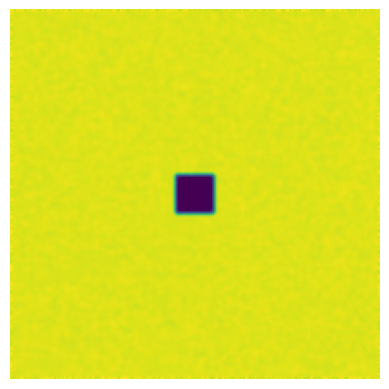

In [3]:
def laplacian2D(Z, dx, dy):
    # Calcula el Laplaciano usando diferencias finitas centradas
    # Se aplican condiciones de borde de Neumann homogéneas (derivada = 0)
    L = (Z[1:-1, 0:-2] + Z[1:-1, 2:] + Z[0:-2, 1:-1] + Z[2:, 1:-1] - 4 * Z[1:-1, 1:-1]) / dx**2
    return L

# Prepara el espacio para la animación
fig, ax = plt.subplots()
img = ax.imshow(U, cmap='viridis', animated=True)
plt.axis('off')

# Función para la animación
def update(frame):
    global U, V
    
    # Crea copias para el cálculo de las derivadas
    Un = U.copy()
    Vn = V.copy()

    # Aplica las condiciones de borde de Neumann homogéneas
    # (El Laplaciano ya se encarga de esto implícitamente en el interior)
    # Los bordes no se actualizan, manteniendo la condición de cero-flujo.
    
    # Calcula los Laplacianos
    lap_U = laplacian2D(Un, dx, dy)
    lap_V = laplacian2D(Vn, dx, dy)
    
    # Actualiza las concentraciones U y V
    U[1:-1, 1:-1] = Un[1:-1, 1:-1] + (Du * lap_U - Un[1:-1, 1:-1] * Vn[1:-1, 1:-1]**2 + F * (1 - Un[1:-1, 1:-1])) * dt
    V[1:-1, 1:-1] = Vn[1:-1, 1:-1] + (Dv * lap_V + Un[1:-1, 1:-1] * Vn[1:-1, 1:-1]**2 - (F + k) * Vn[1:-1, 1:-1]) * dt
    
    # Actualiza la imagen en la animación
    img.set_array(U)
    return img,

# Crea la animación
anim = FuncAnimation(fig, update, frames=200, interval=20, blit=True)
plt.show()
anim.save("gray_scott.gif", writer="pillow")



### 4\. Guardar resultados

Si deseas guardar el estado final de la simulación para su análisis posterior, puedes ejecutar esta celda.


In [4]:
# Guarda el estado final de las concentraciones en un archivo .npz
np.savez('uv_final.npz', U=U, V=V)

print("Simulación finalizada. Archivo 'uv_final.npz' guardado.")

Simulación finalizada. Archivo 'uv_final.npz' guardado.


In [5]:
import numpy as np

# Suponiendo que tu archivo se llama 'datos.npz'
# El objeto `data` contendrá todos los arrays del archivo
with np.load('uv_final.npz') as data:
    print("Arrays almacenados en el archivo npz:", data.files)
    pass

Arrays almacenados en el archivo npz: ['U', 'V']
